In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import requests
import geopandas as gp
from shapely.geometry import Point

In [3]:
import contextily as ctx

In [4]:
dfRaw = pd.read_csv('DenpasarDaratan1.csv')

In [5]:
dfRaw

,Tile Id,Date,Serving Cell Average RSRP (All),Serving Cell Average RSRQ (All),Total MR Count,Longitude,Latitude,geometry
0,'5764608310152453466',2.020000e+16,-125.14,-14.67,36,115.105,-8.84301,POINT (115.10479 -8.843007)
1,'5764608310152453467',2.020000e+16,-120.96,-12.67,149,115.105,-8.84267,POINT (115.10479 -8.842668)
2,'5764608310152453478',2.020000e+16,-121.64,-14.13,90,115.105,-8.84369,POINT (115.105477 -8.843686)
3,'5764608310152453479',2.020000e+16,-121.34,-14.18,47,115.105,-8.84335,POINT (115.105477 -8.843347)
4,'5764608310152453483',2.020000e+16,-120.07,-11.83,57,115.106,-8.84403,POINT (115.106163 -8.844025)
...,...,...,...,...,...,...,...,...
995,'5764608310152510599',2.020000e+16,-120.62,-10.00,8,115.129,-8.80806,POINT (115.128823 -8.808064)
996,'5764608310152510631',2.020000e+16,-124.00,-16.81,51,115.130,-8.80806,POINT (115.130196 -8.808064)
997,'5764608310152510643',2.020000e+16,-121.07,-17.51,41,115.130,-8.80739,POINT (115.130196 -8.807385)
998,'5764608310152510656',2.020000e+16,-124.00,-15.17,12,115.128,-8.80637,POINT (115.128479 -8.806367)


In [6]:
dfRaw['Serving Cell Average RSRP (All)']

0     -125.14
1     -120.96
2     -121.64
3     -121.34
4     -120.07
        ...  
995   -120.62
996   -124.00
997   -121.07
998   -124.00
999   -125.21
Name: Serving Cell Average RSRP (All), Length: 1000, dtype: float64

In [7]:
dfClean = dfRaw[dfRaw['Serving Cell Average RSRP (All)'] < -120.00]

In [8]:
dfClean

,Tile Id,Date,Serving Cell Average RSRP (All),Serving Cell Average RSRQ (All),Total MR Count,Longitude,Latitude,geometry
0,'5764608310152453466',2.020000e+16,-125.14,-14.67,36,115.105,-8.84301,POINT (115.10479 -8.843007)
1,'5764608310152453467',2.020000e+16,-120.96,-12.67,149,115.105,-8.84267,POINT (115.10479 -8.842668)
2,'5764608310152453478',2.020000e+16,-121.64,-14.13,90,115.105,-8.84369,POINT (115.105477 -8.843686)
3,'5764608310152453479',2.020000e+16,-121.34,-14.18,47,115.105,-8.84335,POINT (115.105477 -8.843347)
4,'5764608310152453483',2.020000e+16,-120.07,-11.83,57,115.106,-8.84403,POINT (115.106163 -8.844025)
...,...,...,...,...,...,...,...,...
995,'5764608310152510599',2.020000e+16,-120.62,-10.00,8,115.129,-8.80806,POINT (115.128823 -8.808064)
996,'5764608310152510631',2.020000e+16,-124.00,-16.81,51,115.130,-8.80806,POINT (115.130196 -8.808064)
997,'5764608310152510643',2.020000e+16,-121.07,-17.51,41,115.130,-8.80739,POINT (115.130196 -8.807385)
998,'5764608310152510656',2.020000e+16,-124.00,-15.17,12,115.128,-8.80637,POINT (115.128479 -8.806367)


In [36]:
dfClean.to_csv('DenpasarClean.csv')

In [9]:
geometry = [Point(xy) for xy in zip(dfClean.Longitude, dfClean.Latitude)]
crs = {'init': 'epsg:3857'}
gdf = gp.GeoDataFrame(dfClean,crs=crs, geometry=geometry)

c:\users\a00537739\miniconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


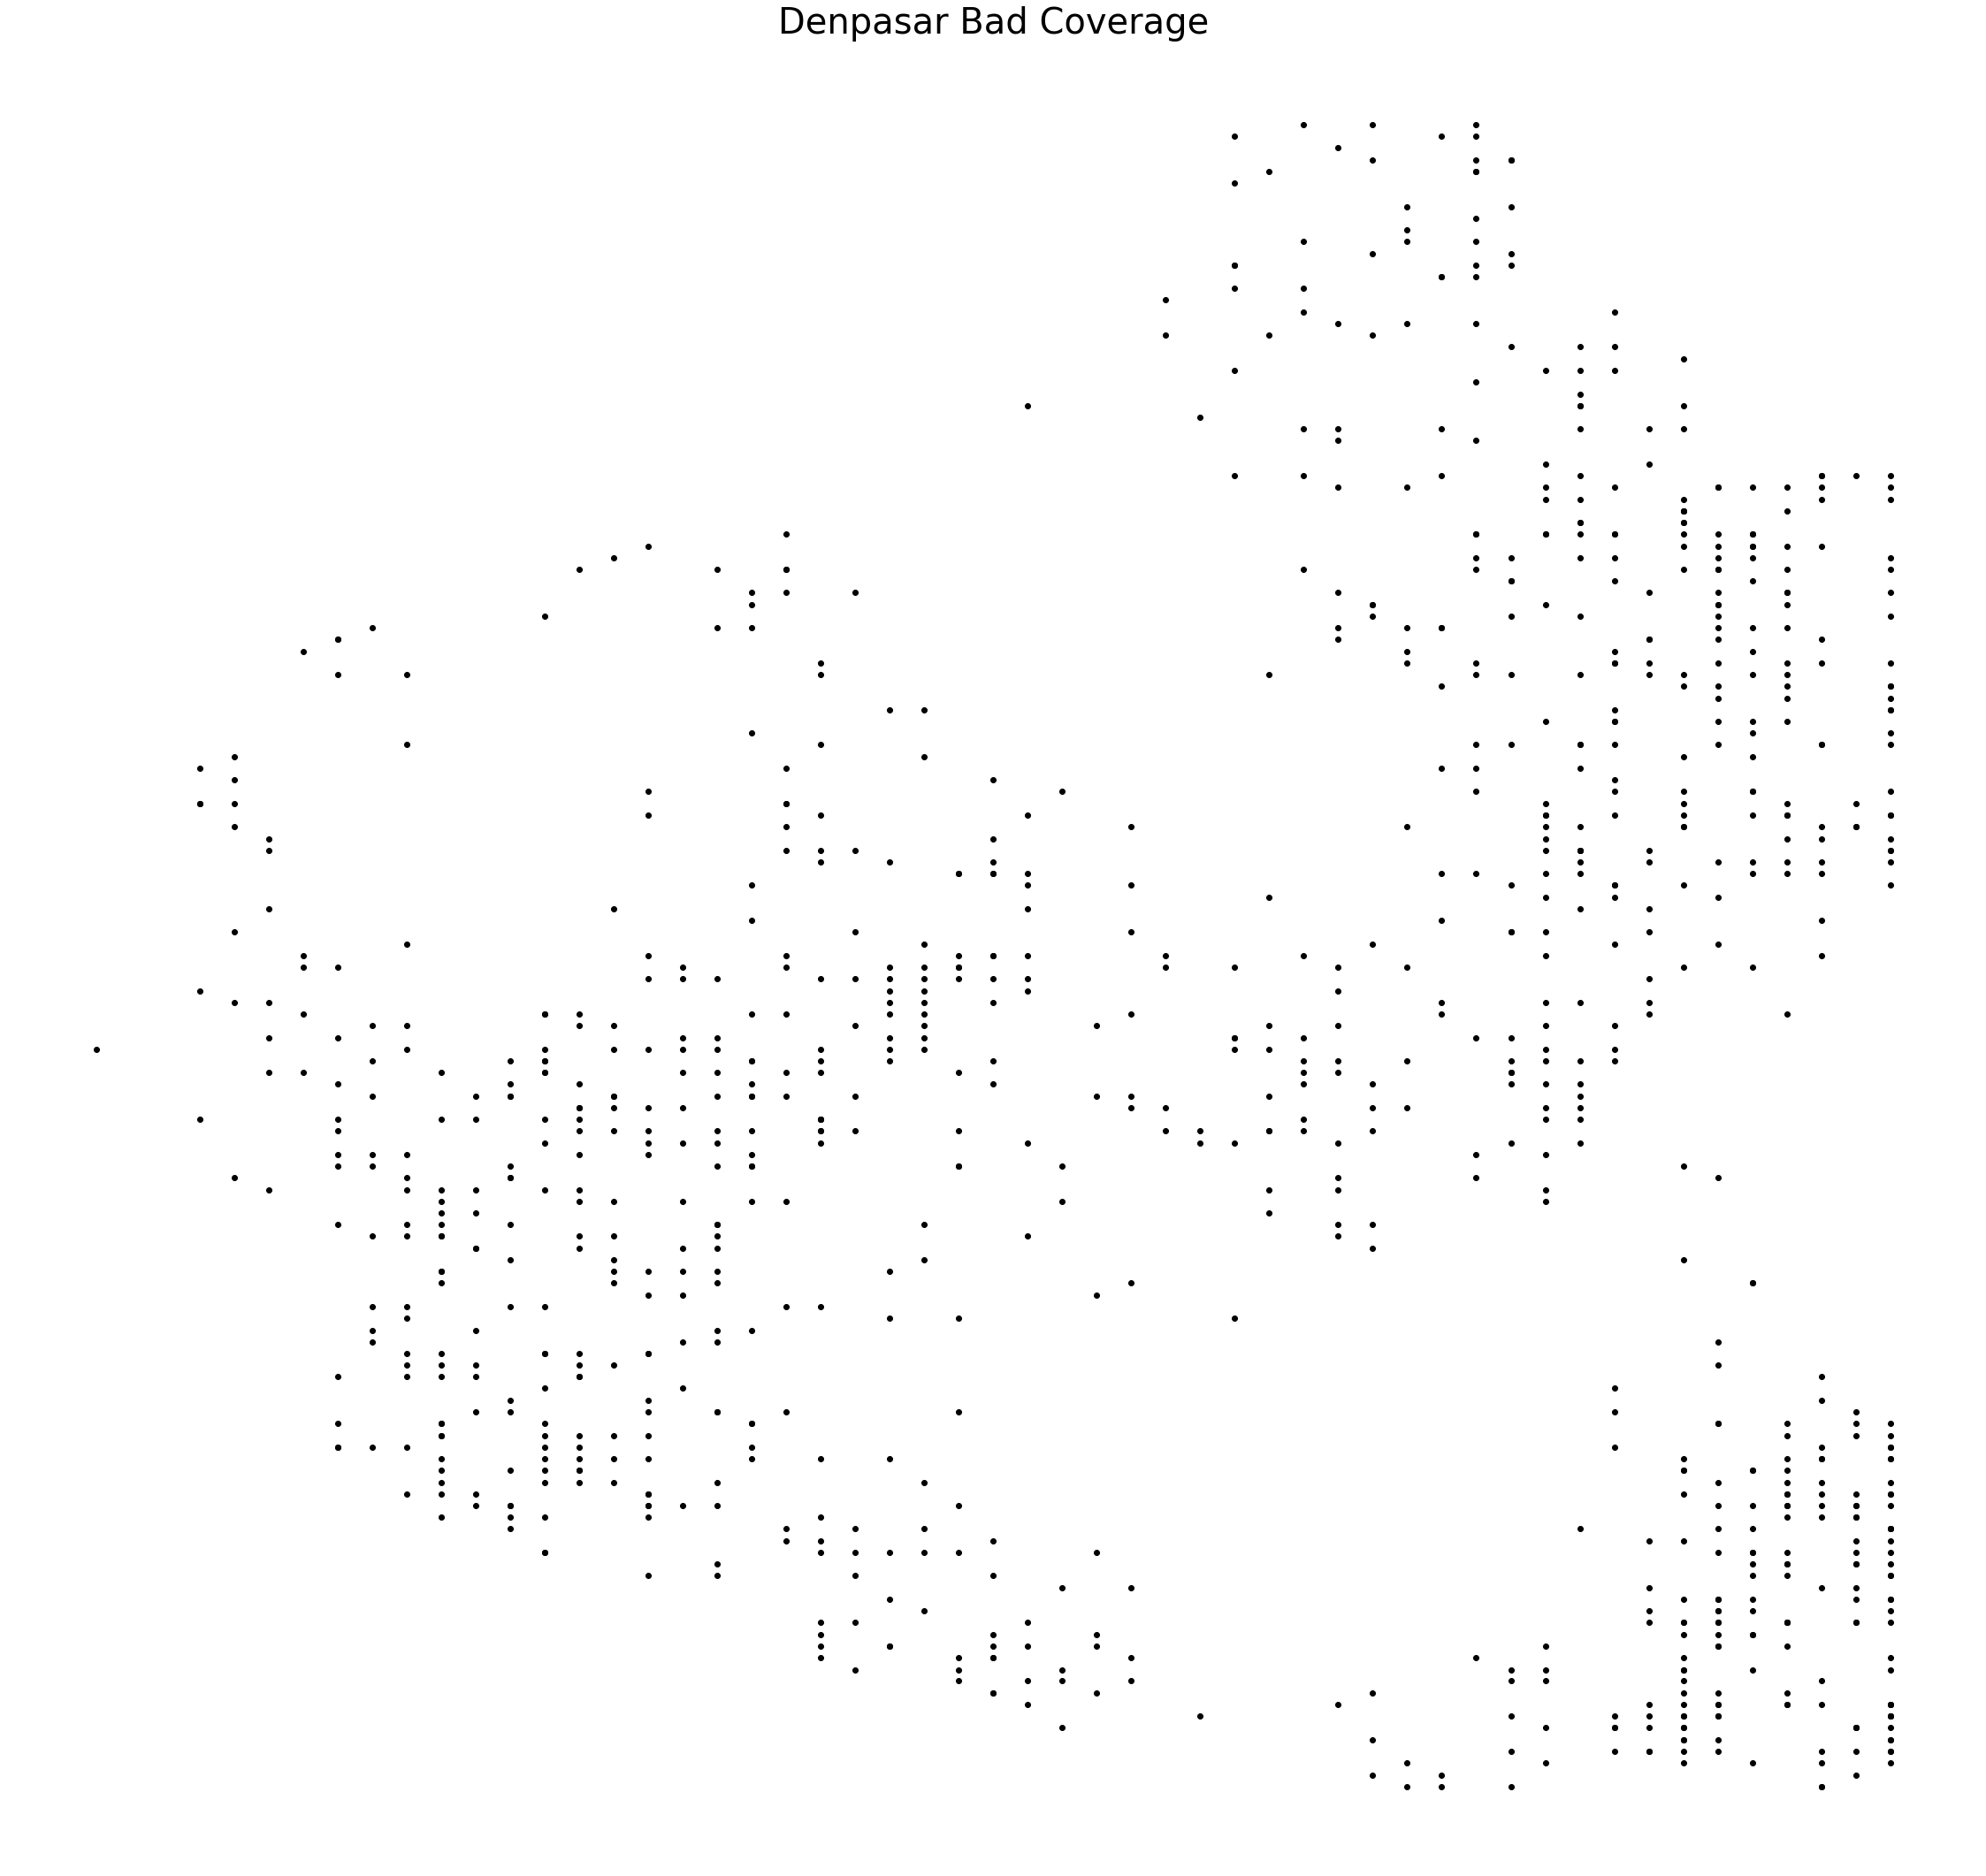

In [10]:
f, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title("Denpasar Bad Coverage", fontsize=40)
ax.set_axis_off()
#LA.plot(ax=ax,  edgecolor='grey')
gdf.plot(ax=ax, color='black')
plt.show()

In [11]:
a=pd.Series(gdf['geometry'].apply(lambda p: p.x))
b=pd.Series(gdf['geometry'].apply(lambda p: p.y))
X=np.column_stack((a,b))

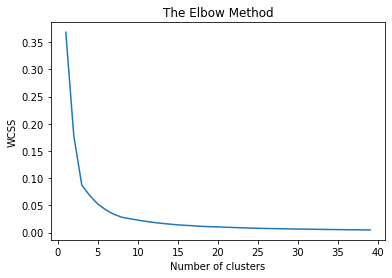

In [12]:
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 40), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(X)
k=pd.DataFrame(y_kmeans, columns=['cluster'])
gdf=gdf.join(k)

In [21]:
centers = kmeans.cluster_centers_

In [23]:
centers

array([[115.126125  ,  -8.82703775],
       [115.10436   ,  -8.8271374 ],
       [115.13328947,  -8.83859329],
       [115.13062791,  -8.81125163],
       [115.09892424,  -8.8286203 ],
       [115.11757692,  -8.82768942],
       [115.1042439 ,  -8.83847341],
       [115.12158333,  -8.80285438],
       [115.0926    ,  -8.829784  ],
       [115.13382456,  -8.81833789],
       [115.12705085,  -8.81985763],
       [115.135     ,  -8.84440273],
       [115.0892963 ,  -8.81991296],
       [115.11057143,  -8.84315314],
       [115.09627027,  -8.83723243],
       [115.12378947,  -8.84563263],
       [115.10353333,  -8.81499533],
       [115.10921569,  -8.82306549],
       [115.12260976,  -8.81192732],
       [115.13014815,  -8.84417593]])

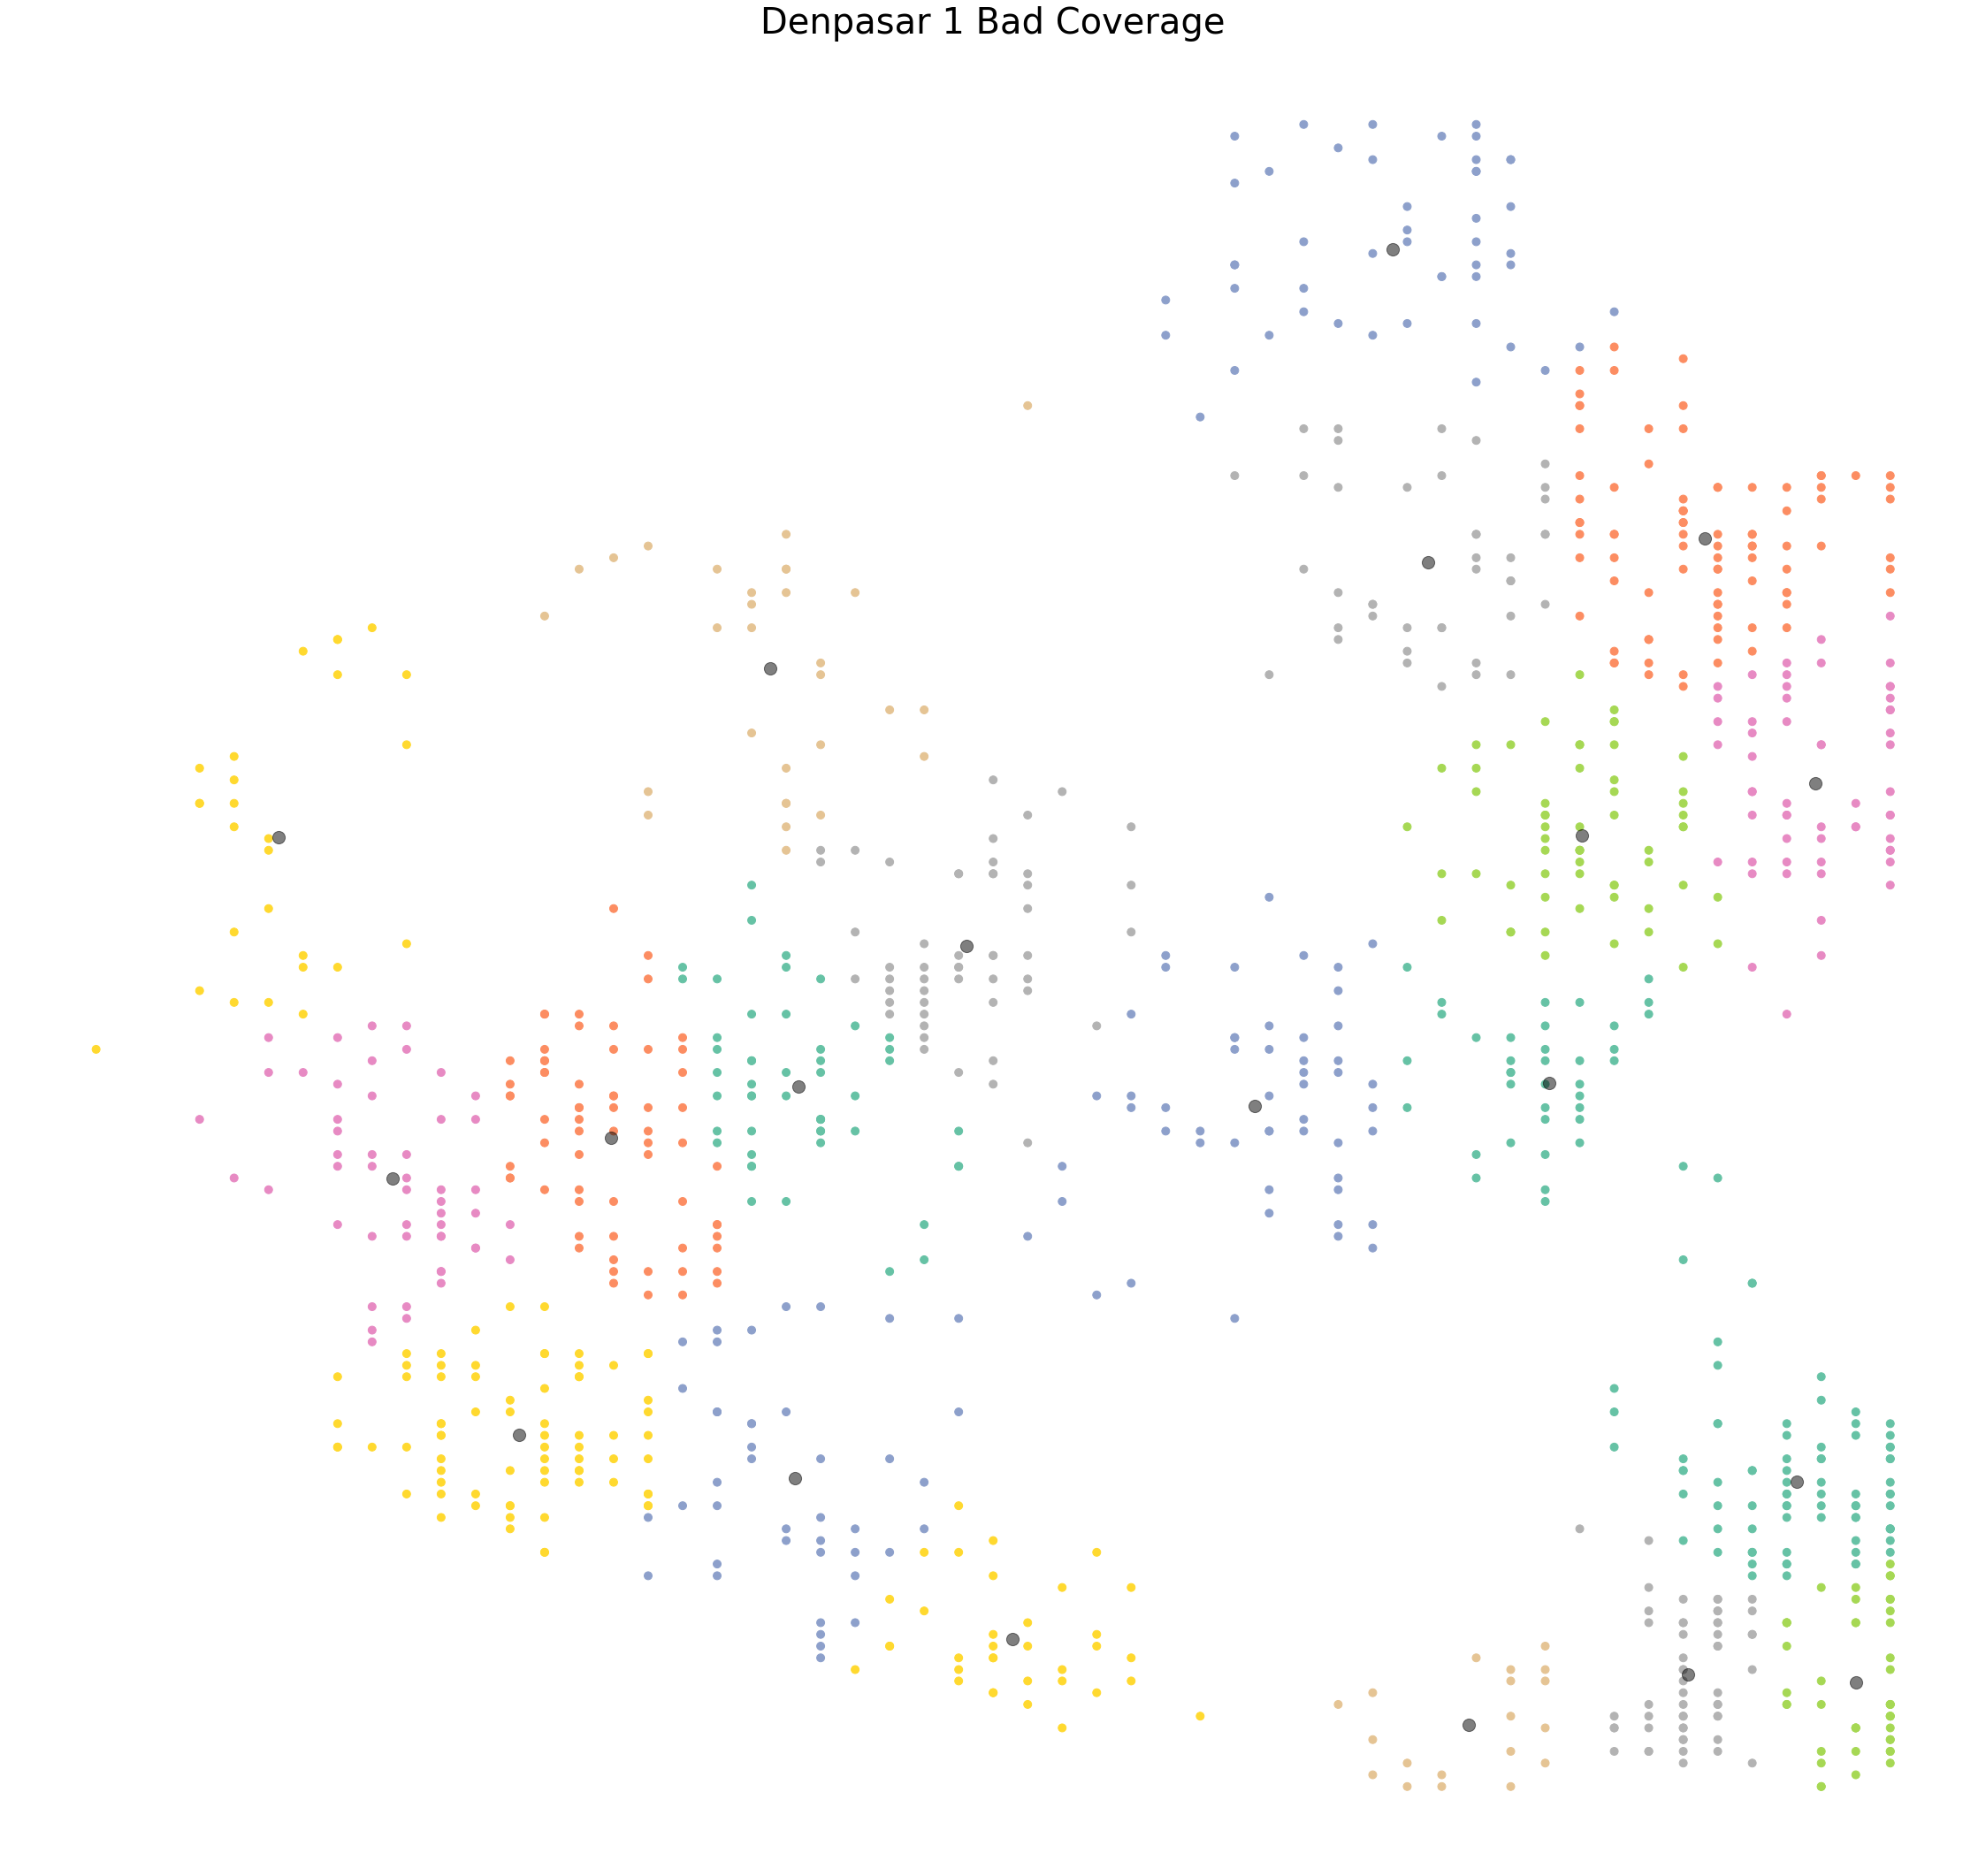

In [29]:
f, ax = plt.subplots(1, figsize=(40, 40))
ax.set_title("Denpasar 1 Bad Coverage", fontsize=40)
ax.set_axis_off()
gdf.plot(column='cluster',cmap='Set2', ax=ax, markersize=80)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [15]:
gdf

,Tile Id,Date,Serving Cell Average RSRP (All),Serving Cell Average RSRQ (All),Total MR Count,Longitude,Latitude,geometry,cluster
0,'5764608310152453466',2.020000e+16,-125.14,-14.67,36,115.105,-8.84301,POINT (115.10500 -8.84301),6
1,'5764608310152453467',2.020000e+16,-120.96,-12.67,149,115.105,-8.84267,POINT (115.10500 -8.84267),6
2,'5764608310152453478',2.020000e+16,-121.64,-14.13,90,115.105,-8.84369,POINT (115.10500 -8.84369),6
3,'5764608310152453479',2.020000e+16,-121.34,-14.18,47,115.105,-8.84335,POINT (115.10500 -8.84335),6
4,'5764608310152453483',2.020000e+16,-120.07,-11.83,57,115.106,-8.84403,POINT (115.10600 -8.84403),13
...,...,...,...,...,...,...,...,...,...
995,'5764608310152510599',2.020000e+16,-120.62,-10.00,8,115.129,-8.80806,POINT (115.12900 -8.80806),3
996,'5764608310152510631',2.020000e+16,-124.00,-16.81,51,115.130,-8.80806,POINT (115.13000 -8.80806),3
997,'5764608310152510643',2.020000e+16,-121.07,-17.51,41,115.130,-8.80739,POINT (115.13000 -8.80739),3
998,'5764608310152510656',2.020000e+16,-124.00,-15.17,12,115.128,-8.80637,POINT (115.12800 -8.80637),3


In [26]:
gdf.to_csv('DenpasarDaratan1withCluster.csv')